In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, SpatialDropout2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import to_categorical
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [2]:
def classifica(num):
    switcher = {
        1: "Moeda de 1 Real (Anverso), segunda família",
        2: "Moeda de 1 Real (Verso), primeira família",
        3: "Moeda de 1 Real (Verso), segunda família",
        4: "Valor não identificável, Anverso da primeira família",
        5: "Moeda de 5 Centavos (Anverso), segunda família",
        6: "Moeda de 5 Centavos (Verso), primeira família",
        7: "Moeda de 5 Centavos (Verso), segunda família",
        8: "Moeda de 10 Centavos (Anverso), segunda família",
        9: "Moeda de 10 Centavos (Verso), primeira família",
        10: "Moeda de 10 Centavos (Verso), segunda família",
        11: "Moeda de 25 Centavos (Anverso), primeira família",
        12: "Moeda de 25 Centavos (Anverso), segunda família",
        13: "Moeda de 25 Centavos (Verso), primeira família",
        14: "Moeda de 25 Centavos (Verso), segunda família",
        15: "Moeda de 50 Centavos (Verso), primeira família",
        16: "Moeda de 50 Centavos (Anverso), segunda família",
        17: "Moeda de 50 Centavos (Verso), segunda família",
    }
    return switcher.get(num, "Moeda não reconhecida")

## Recebendo a imagem a ser classificada

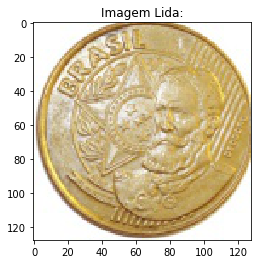

In [8]:
img_consumo = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Normal\\12_1.jpg')
plt.title("Imagem Lida:")
plt.imshow(cv2.cvtColor(img_consumo, cv2.COLOR_BGR2RGB))
plt.show()

## Definindo a Arquitetura da rede

In [5]:
entrada = Input(shape=(img_consumo.shape))
conv1 = Conv2D(32, 3, activation='relu')(entrada)
max1 = MaxPooling2D()(conv1)
conv_drop1 = SpatialDropout2D(0.025)(max1)
conv2 = Conv2D(64, 3, activation='relu')(conv_drop1)
max2 = MaxPooling2D()(conv2)
conv_drop2 = SpatialDropout2D(0.05)(max2)
conv3 = Conv2D(128, 3, activation='relu')(conv_drop2)
max3 = MaxPooling2D()(conv3)
conv_drop3 = SpatialDropout2D(0.1)(max3)
flatten = Flatten()(conv_drop3)
densa1 = Dense(512, activation='relu')(flatten)
densa_drop1 = Dropout(0.1)(densa1)
densa2 = Dense(512, activation='relu')(densa_drop1)
densa_drop2 = Dropout(0.1)(densa2)
saida = Dense(18, activation='softmax')(densa_drop2)
model = Model(entrada, saida)

W1025 11:51:42.836716  9160 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1025 11:51:42.892732  9160 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1025 11:51:42.904733  9160 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1025 11:51:42.972834  9160 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1025 11:51:43.016766  9160 deprecation

## Carregando um modelo já treinado

In [6]:
model.load_weights("coinnet_epoch_33.hdf5")

W1025 11:51:49.596473  9160 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



## Classificando a moeda

In [9]:
img = []
img.append(img_consumo)
img = np.array(img)
pred = model.predict(img)
print(classifica(np.argmax(pred)))

Moeda de 25 Centavos (Anverso), segunda família
